## Exploratory Data Analysis

Exploratory Data Analysis adalah langkah yang penting pada proyek data analysis dan data science. EDA merupakan proses dimana kita dapat menemukan anomali dan pola yang ada pada dataset yang kita miliki. 


## Import library yang akan digunakan

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import isodate

from dateutil import parser
from datetime import datetime
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from googleapiclient.discovery import build
from IPython.display import JSON
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookair/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Buat variabel API Key 

In [8]:
api_key = '#############################' #gunakan api key sendiri 

## Buat variabel ID Channel Youtube yang akan dianalisis, Channel youtube yang di analisis dapat lebih dari 1

In [9]:
channel_id = ["UCC_OYI6VZtuEZuq49Ht-cQQ", 
              #channelbisalebihdarisatu
              
]

In [10]:
api_service_name = "youtube"
api_version = "v3"

youtube = build(
  api_service_name, api_version, developerKey=api_key)

In [11]:
def get_channel_stats(youtube, channel_id):

    all_data = []

    request = youtube.channels().list(
      part="snippet,contentDetails,statistics",
      id=','.join(channel_id)
    )
    response = request.execute()

    #loop melalui items
    for item in response['items']:
        data = {'Channel' : item['snippet']['title'],
                'Subscribers' : item['statistics']['subscriberCount'],
                'Views' : item ['statistics']['viewCount'],
                'TotalVideo' : item ['statistics']['videoCount'],
                'playlistId' : item ['contentDetails']['relatedPlaylists']['uploads']
        }
        all_data.append(data)
    return(pd.DataFrame(all_data))

In [13]:
channel_stats

,Channel,Subscribers,Views,TotalVideo,playlistId
0,Ferry Irwandi,517000,31013156,144,UUC_OYI6VZtuEZuq49Ht-cQQ


In [14]:
playlist_id = "UUC_OYI6VZtuEZuq49Ht-cQQ"

def get_video_ids(youtube, playlist_id):

    video_ids = []

    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId= playlist_id,
        maxResults = 50
    )
    response = request.execute()

    for item in response ['items']:
        video_ids.append(item['contentDetails']['videoId'])
    
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
                    part="snippet,contentDetails",
                    playlistId= playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
        response = request.execute()

        for item in response ['items']:
            video_ids.append(item['contentDetails']['videoId'])
    
        next_page_token = response.get('nextPageToken')
    return video_ids

In [15]:
video_ids = get_video_ids(youtube, playlist_id)

In [16]:
# Jumlah video yang di upload

print(f"Jumlah video yang ditelah di upload oleh Ferry Irwandi adalah {len(video_ids)} video.")

Jumlah video yang ditelah di upload oleh Ferry Irwandi adalah 144 video.


In [17]:
video_ids

['Y3z_485WMt0',
 'N-FYNNtAFc8',
 'ea874e1eCfs',
 'lMXAt9Roxz0',
 '2GWqd_tRslM',
 'QDCy_xF_V34',
 'SYNe-nyZF5w',
 'e32EIpirJiM',
 'qxf1jUAwREY',
 'GD5Pc29IpVM',
 'JN1Jd5QJipw',
 'VSR0h04OiYo',
 'r3CeM-e55Kw',
 'Np5sAN5V4hE',
 '4HEYbgB-Hek',
 '2IsxHpkyenk',
 'I1wgZcYE3ow',
 'sHay-FbyplE',
 'bKNKEx_B49Y',
 'vcaXu1BkTWM',
 '5PP1FTdaiv0',
 'D4lSvlUoNV0',
 'v-Fn_caNsAs',
 'CevZkOcAh5s',
 'ouIT-23Pu9o',
 'D7DbBFc0UkM',
 'thuoQ15uJ-M',
 'Vc6QbGJrJ6c',
 'IP_C8uYaR2E',
 '-vfBTAZ-Bzw',
 'JuXc-C6sveo',
 '2qKAP8Vfvsg',
 'VMGnZdcv9II',
 'hhs8jNZZw_U',
 '9-BubtpMRoc',
 'pCmG3cpoBi4',
 '6M8Ve5K_OHY',
 'bcJon2L7k78',
 'aHO6Lf6y684',
 'irdE4jy5J4I',
 'YmA6Dvm_obo',
 'eKVSaQEphuw',
 'fsZjCMS31Pc',
 'wA66ws_ckUw',
 'wvqFeaAiLmI',
 '8c7TtPWoo4I',
 '15L0rNuor0Y',
 'hMfiG5gvVC4',
 'dBl9oL9_3U0',
 'KbJCGO3bM_k',
 'cmlW1Rp-fSc',
 'mXKAeWr-Gyw',
 '78dwoSFfSkU',
 'J9O0nVtxeTg',
 'NJmcpRFS8Yc',
 'gPFlZcq_fGc',
 '1fs9zPZbg9c',
 'vImlPBNJ-m4',
 'eaMDN3kAgCA',
 'QtqtDpwL91U',
 'dX3UasOr94Q',
 'yaNOtypueck',
 'dPwdl_

In [18]:
def get_video_details (youtube, video_ids):
    all_video_info = []

    for i in range (0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
            )

        response = request.execute()

        for video in response['items']:
            stats_to_keep = {'snippet' : ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                            'statistics' : ['viewCount', 'likeCount', 'favouriteCounts', 'commentCount'], 
                            'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info ['video_id'] = video ['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video [k] [v]
                    except:
                        video_info[v] = None 
            all_video_info.append(video_info)

    return pd.DataFrame(all_video_info)
  

In [19]:
video_df = get_video_details (youtube, video_ids)

In [20]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCounts,commentCount,duration,definition,caption
0,Y3z_485WMt0,Ferry Irwandi,"""Open Minded"" dan Paradox Toleransi.","Hallo warga Sipil sekalian, selamat datang di ...","[open minded, feminis, debat, ferry irwandi, t...",2022-11-08T10:21:58Z,116308,6645,None,953,PT11M49S,hd,false
1,N-FYNNtAFc8,Ferry Irwandi,"Era Crazy Rich Berakhir, Saatnya Memulai Era B...",Mari memulai era baru!,"[crazy rich, crazy kind, ferry irwandi, indra ...",2022-11-07T14:12:35Z,131185,7043,None,708,PT9M20S,hd,false
2,ea874e1eCfs,Ferry Irwandi,Memahami Tapering Ekonomi Ft Menkeu Sri Mulyan...,Selamat Datang di Docuvlog Spesial \nDi konten...,"[ekonomi, resesi, ekonomi indonesia, finansial...",2022-10-31T09:46:11Z,198703,8804,None,815,PT20M14S,hd,false
3,lMXAt9Roxz0,Ferry Irwandi,Mengapa Dollar Terus Menguat?,Situasi ekonomi global saat ini penuh guncanga...,"[dollar, ekonomi gelap, raymond chin, resesi 2...",2022-10-25T13:34:55Z,226042,7666,None,825,PT12M19S,hd,false
4,2GWqd_tRslM,Ferry Irwandi,Diplomasi Jenius Agus Salim dan Asap Kretek,Teman Makan - kali ini kita akan membicarakan...,"[agus salim, jenggot kambing, kretek, ferry ir...",2022-10-21T13:31:55Z,236690,11191,None,690,PT12M21S,hd,false


In [21]:
video_df.dtypes

video_id           object
channelTitle       object
title              object
description        object
tags               object
publishedAt        object
viewCount          object
likeCount          object
favouriteCounts    object
commentCount       object
duration           object
definition         object
caption            object
dtype: object

## Mendapatkan komen atau mengimpor komen pada channel tersebut

In [22]:
def get_comments_in_videos (youtube, video_ids):
    all_comments = []

    for video_id in video_ids: 
          request = youtube.commentThreads().list(
              part = "snippet,replies", 
              videoId = video_id
          )
          response = request.execute()

          comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:]]
          comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

          all_comments.append(comments_in_video_info)
                
    return pd.DataFrame(all_comments)

In [23]:
comment_df = get_comments_in_videos (youtube, video_ids)

In [24]:
comment_df

,video_id,comments
0,Y3z_485WMt0,[Bahasan bang ferry ini opini halus ke popon k...
1,N-FYNNtAFc8,"[btw yg binomo dulu.\nitu iklan nya parah , mu..."
2,ea874e1eCfs,"[Hallo Warga Sipil Sekalian, Selamat datang di..."
3,lMXAt9Roxz0,[HALLO WARGA SIPIL SEKALIAN SELAMAT MENIKMATI ...
4,2GWqd_tRslM,"[8:45 ekpresi giring kalo kepilih 2024 nnti, A..."
...,...,...
139,fYIdiPAyqrg,"[MasyaaAllah... Ihh bagusss sumpah ✨✨✨, gokill..."
140,NDY5LJEo-lU,"[belum stoic, ciee ciee ahayy, Buzutt beda bg..."
141,0S7KnoxCOuA,"[Keren bang, Ganteng amat bang tanpa kumis 😁, ..."
142,rTj4wj2hQgI,"[Ngeri ngeriii, masa perjuangan warga sipil, V..."


In [25]:
# jadwal upload video 
# Mengubah menjadi format datetime 
import datetime
video_df["Waktu_Upload"] = pd.to_datetime(video_df["publishedAt"])

In [26]:
# Mengubah tipe data timestamp(object) pada dataframe ke dalam second atau detik
detik = pd.to_timedelta(video_df["duration"])
from datetime import timedelta
listdetik = []
for i in detik:
    listdetik.append(i.total_seconds())

video_df["Durasi(detik)"] = listdetik
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCounts,commentCount,duration,definition,caption,Waktu_Upload,Durasi(detik)
0,Y3z_485WMt0,Ferry Irwandi,"""Open Minded"" dan Paradox Toleransi.","Hallo warga Sipil sekalian, selamat datang di ...","[open minded, feminis, debat, ferry irwandi, t...",2022-11-08T10:21:58Z,116308,6645,None,953,PT11M49S,hd,false,2022-11-08 10:21:58+00:00,709.0
1,N-FYNNtAFc8,Ferry Irwandi,"Era Crazy Rich Berakhir, Saatnya Memulai Era B...",Mari memulai era baru!,"[crazy rich, crazy kind, ferry irwandi, indra ...",2022-11-07T14:12:35Z,131185,7043,None,708,PT9M20S,hd,false,2022-11-07 14:12:35+00:00,560.0
2,ea874e1eCfs,Ferry Irwandi,Memahami Tapering Ekonomi Ft Menkeu Sri Mulyan...,Selamat Datang di Docuvlog Spesial \nDi konten...,"[ekonomi, resesi, ekonomi indonesia, finansial...",2022-10-31T09:46:11Z,198703,8804,None,815,PT20M14S,hd,false,2022-10-31 09:46:11+00:00,1214.0
3,lMXAt9Roxz0,Ferry Irwandi,Mengapa Dollar Terus Menguat?,Situasi ekonomi global saat ini penuh guncanga...,"[dollar, ekonomi gelap, raymond chin, resesi 2...",2022-10-25T13:34:55Z,226042,7666,None,825,PT12M19S,hd,false,2022-10-25 13:34:55+00:00,739.0
4,2GWqd_tRslM,Ferry Irwandi,Diplomasi Jenius Agus Salim dan Asap Kretek,Teman Makan - kali ini kita akan membicarakan...,"[agus salim, jenggot kambing, kretek, ferry ir...",2022-10-21T13:31:55Z,236690,11191,None,690,PT12M21S,hd,false,2022-10-21 13:31:55+00:00,741.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,fYIdiPAyqrg,Ferry Irwandi,IPHONE 6 VIDEO TEST : FILM LOOK,IPHONE 6 Camera Test : Cinematic Look\nLocatio...,"[iphone 6, iphone 7, iphone 6 camera test, iph...",2017-04-05T09:13:14Z,26607,582,None,19,PT48S,hd,false,2017-04-05 09:13:14+00:00,48.0
140,NDY5LJEo-lU,Ferry Irwandi,"Senja 7 Juni, (Ferry & Muthia wedding video)...","Nyanyian es batu dan sepuntung rokok, \n\nvide...","[wedding video, wedding video indonesia, weddi...",2015-12-06T15:41:03Z,16173,534,None,38,PT7M43S,hd,false,2015-12-06 15:41:03+00:00,463.0
141,0S7KnoxCOuA,Ferry Irwandi,IWAN FALS-Izinkan aku menyayangimu (cover by I...,watch in HD for the best quality :)\ntwitter:h...,"[IWAN FALS, iwan fals ibu, iwan fals bento, be...",2013-06-06T16:20:56Z,23696,297,None,35,PT3M59S,hd,false,2013-06-06 16:20:56+00:00,239.0
142,rTj4wj2hQgI,Ferry Irwandi,ANAK JALANAN-Chrisye[Irwandiferry Feat Sigit c...,#saveourmusic project\ntwitter: https://twitte...,"[+cover, indonesia, song, rock, chrisye, anak ...",2012-10-20T03:23:39Z,9842,172,None,35,PT4M45S,hd,false,2012-10-20 03:23:39+00:00,285.0


In [27]:
# Mengubah tipe data menjadi int atau string agar dapat dilakukan visualisai atau convert tipe data ke numeric 
penonton = []
for i in video_df["viewCount"]:
    penonton.append(int(i))

video_df["viewCount"] = penonton

like = []
for i in video_df["likeCount"]:
    like.append(int(i))
video_df["likeCount"] = like

komentar = []
for i in video_df["commentCount"]:
    komentar.append(int(i))
video_df["commentCount"] = komentar

In [28]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   video_id         144 non-null    object             
 1   channelTitle     144 non-null    object             
 2   title            144 non-null    object             
 3   description      144 non-null    object             
 4   tags             140 non-null    object             
 5   publishedAt      144 non-null    object             
 6   viewCount        144 non-null    int64              
 7   likeCount        144 non-null    int64              
 8   favouriteCounts  0 non-null      object             
 9   commentCount     144 non-null    int64              
 10  duration         144 non-null    object             
 11  definition       144 non-null    object             
 12  caption          144 non-null    object             
 13  Waktu_Upload     144

In [29]:
deskripsi = []
for i in video_df["description"]:
    deskripsi.append(i.replace("\n", " "))
    
video_df["description"] = deskripsi

## Data Pre Processing

In [30]:
video_df.isnull().any()

video_id           False
channelTitle       False
title              False
description        False
tags                True
publishedAt        False
viewCount          False
likeCount          False
favouriteCounts     True
commentCount       False
duration           False
definition         False
caption            False
Waktu_Upload       False
Durasi(detik)      False
dtype: bool

In [76]:
 numeric_cols = ['viewCount', 'likeCount', 'favouriteCounts', 'commentCount']
 video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)
 

In [77]:
 numeric_cols

['viewCount', 'likeCount', 'favouriteCounts', 'commentCount']

In [78]:
# Menghitung Jumlah Tag pada masing-masing video
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [79]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCounts,commentCount,duration,definition,caption,Waktu_Upload,Durasi(detik),tagCount,year,month
0,Y3z_485WMt0,Ferry Irwandi,"""Open Minded"" dan Paradox Toleransi.","Hallo warga Sipil sekalian, selamat datang di ...","[open minded, feminis, debat, ferry irwandi, t...",2022-11-08 10:21:58+00:00,116308.0,6645.0,NaN,953.0,PT11M49S,hd,false,2022-11-08 10:21:58+00:00,709.0,6,2022,11
1,N-FYNNtAFc8,Ferry Irwandi,"Era Crazy Rich Berakhir, Saatnya Memulai Era B...",Mari memulai era baru!,"[crazy rich, crazy kind, ferry irwandi, indra ...",2022-11-07 14:12:35+00:00,131185.0,7043.0,NaN,708.0,PT9M20S,hd,false,2022-11-07 14:12:35+00:00,560.0,5,2022,11
2,ea874e1eCfs,Ferry Irwandi,Memahami Tapering Ekonomi Ft Menkeu Sri Mulyan...,Selamat Datang di Docuvlog Spesial Di konten ...,"[ekonomi, resesi, ekonomi indonesia, finansial...",2022-10-31 09:46:11+00:00,198703.0,8804.0,NaN,815.0,PT20M14S,hd,false,2022-10-31 09:46:11+00:00,1214.0,10,2022,10
3,lMXAt9Roxz0,Ferry Irwandi,Mengapa Dollar Terus Menguat?,Situasi ekonomi global saat ini penuh guncanga...,"[dollar, ekonomi gelap, raymond chin, resesi 2...",2022-10-25 13:34:55+00:00,226042.0,7666.0,NaN,825.0,PT12M19S,hd,false,2022-10-25 13:34:55+00:00,739.0,7,2022,10
4,2GWqd_tRslM,Ferry Irwandi,Diplomasi Jenius Agus Salim dan Asap Kretek,Teman Makan - kali ini kita akan membicarakan...,"[agus salim, jenggot kambing, kretek, ferry ir...",2022-10-21 13:31:55+00:00,236690.0,11191.0,NaN,690.0,PT12M21S,hd,false,2022-10-21 13:31:55+00:00,741.0,4,2022,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,fYIdiPAyqrg,Ferry Irwandi,IPHONE 6 VIDEO TEST : FILM LOOK,IPHONE 6 Camera Test : Cinematic Look Location...,"[iphone 6, iphone 7, iphone 6 camera test, iph...",2017-04-05 09:13:14+00:00,26607.0,582.0,NaN,19.0,PT48S,hd,false,2017-04-05 09:13:14+00:00,48.0,20,2017,4
140,NDY5LJEo-lU,Ferry Irwandi,"Senja 7 Juni, (Ferry & Muthia wedding video)...","Nyanyian es batu dan sepuntung rokok, video ...","[wedding video, wedding video indonesia, weddi...",2015-12-06 15:41:03+00:00,16173.0,534.0,NaN,38.0,PT7M43S,hd,false,2015-12-06 15:41:03+00:00,463.0,24,2015,12
141,0S7KnoxCOuA,Ferry Irwandi,IWAN FALS-Izinkan aku menyayangimu (cover by I...,watch in HD for the best quality :) twitter:ht...,"[IWAN FALS, iwan fals ibu, iwan fals bento, be...",2013-06-06 16:20:56+00:00,23696.0,297.0,NaN,35.0,PT3M59S,hd,false,2013-06-06 16:20:56+00:00,239.0,16,2013,6
142,rTj4wj2hQgI,Ferry Irwandi,ANAK JALANAN-Chrisye[Irwandiferry Feat Sigit c...,#saveourmusic project twitter: https://twitter...,"[+cover, indonesia, song, rock, chrisye, anak ...",2012-10-20 03:23:39+00:00,9842.0,172.0,NaN,35.0,PT4M45S,hd,false,2012-10-20 03:23:39+00:00,285.0,9,2012,10


## EDA 
Exploratory data analysis can help detect obvious errors, identify outliers in datasets, understand relationships, unearth important factors, find patterns within data, and provide new insights. (https://www.simplilearn.com/exploratory-data-analysis-article?source=frs_category#eda_basics)

## Jumlah video yang diupload oleh Ferry Irwandi dari tahun ke tahun

In [50]:
video_df['publishedAt'] = pd.to_datetime(video_df.publishedAt)
video_df.loc[:,'year'] = video_df['publishedAt'].dt.year
video_df.loc[:, 'month'] = video_df['publishedAt'].dt.month

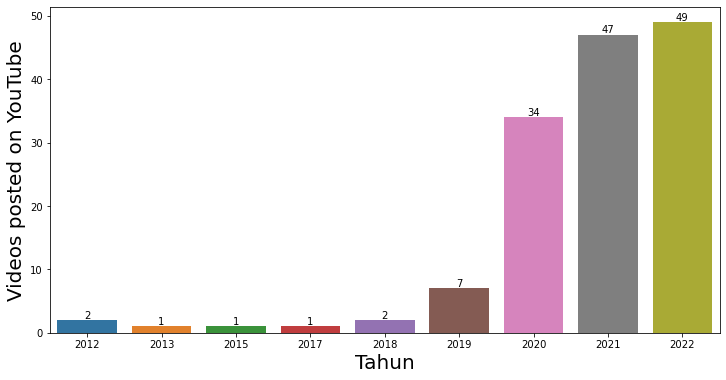

In [89]:
plt.figure(figsize=(12,6))
ax = year_wise_video_count = sns.countplot(x='year', data=video_df)
ax.bar_label(ax.containers[0])
year_wise_video_count.set_xlabel('Tahun', fontsize=20)
year_wise_video_count.set_ylabel('Videos posted on YouTube', fontsize=20)
plt.show()

## Total video yang ditonton pada channel Ferry Irwandi dari tahun ke tahun 

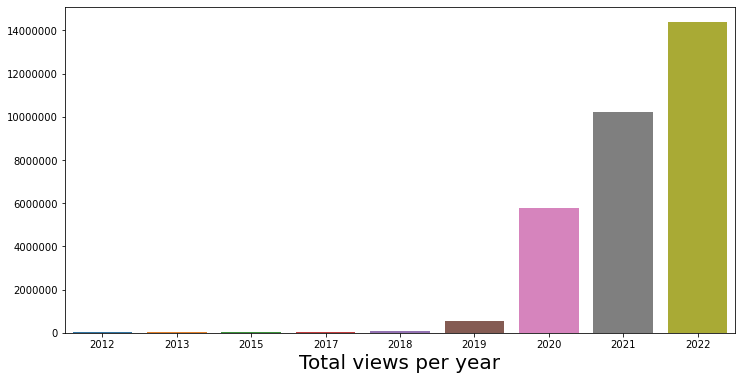

In [93]:

result = video_df.groupby('year')['viewCount'].agg('sum').reset_index().sort_values('viewCount')
# number of videos posted on youtube comedian wise count
plt.figure(figsize=(12,6))
ax = plot = sns.barplot(x='year', 
                   y='viewCount', 
                   data=result                  
                  )
plot.set_ylabel('', fontsize=0)
plot.set_xlabel('Total views per year', fontsize=20)
plot.ticklabel_format(style='plain', axis='y', useOffset=False)

## 5 Video dengan view tertinggi

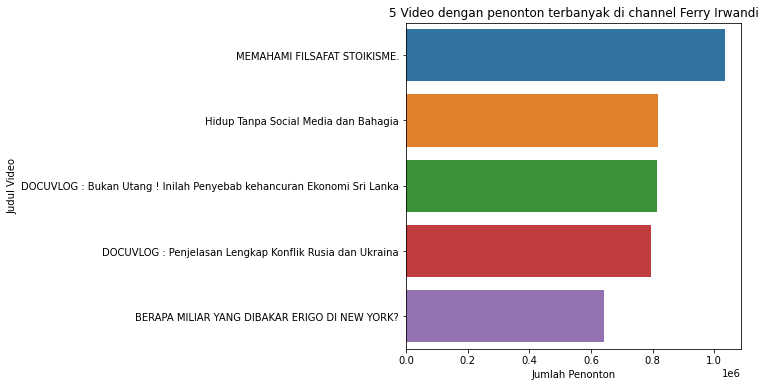

In [53]:
plt.figure(figsize = (6,6))
plt.title ("5 Video dengan penonton terbanyak di channel Ferry Irwandi", size = 12)
bplot = sns.barplot(x = video_df['viewCount'], y = video_df['title'], order = video_df.sort_values('viewCount', ascending= False)['title'].iloc[:5])
plt.xlabel('Jumlah Penonton')
plt.ylabel('Judul Video')
plt.show()

## 5 Video dengan view terendah

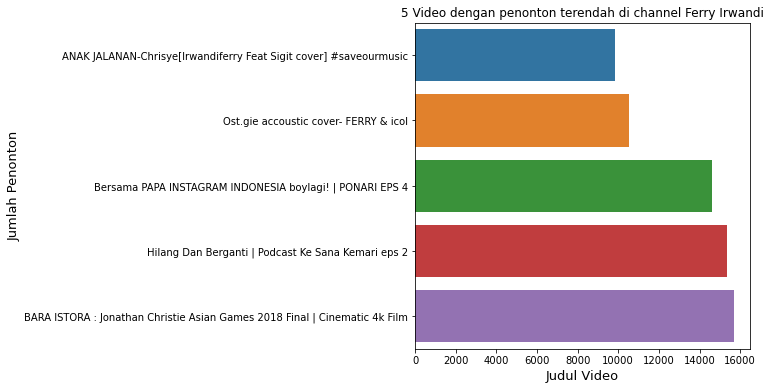

In [54]:
plt.figure(figsize = (6,6))
plt.title ("5 Video dengan penonton terendah di channel Ferry Irwandi", size = 12)
bplot = sns.barplot(x = video_df['viewCount'], y = video_df['title'], order = video_df.sort_values('viewCount', ascending= True)['title'].iloc[:5])
plt.xlabel ('Judul Video', fontsize=13)
plt.ylabel ('Jumlah Penonton', fontsize=13)
plt.show()

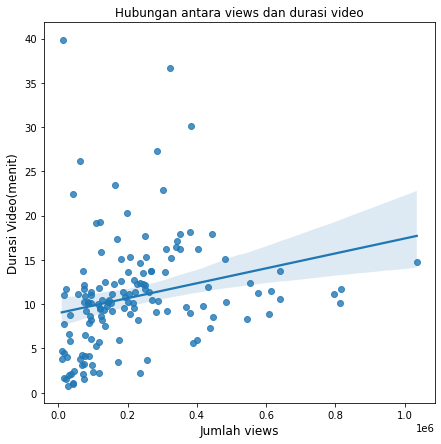

In [68]:
plt.figure(figsize = (7,7))
plt.title('Hubungan antara views dan durasi video')
sns.regplot(x = video_df['viewCount'], y = video_df['Durasi(detik)']/60)
plt.xlabel('Jumlah views', fontsize = 12)
plt.ylabel('Durasi Video(menit)', fontsize = 12)
plt.show()

# Tidak terdapat korelasi antara Durasi Video yang dibuat oleh Ferry Irwandi dengan Views 

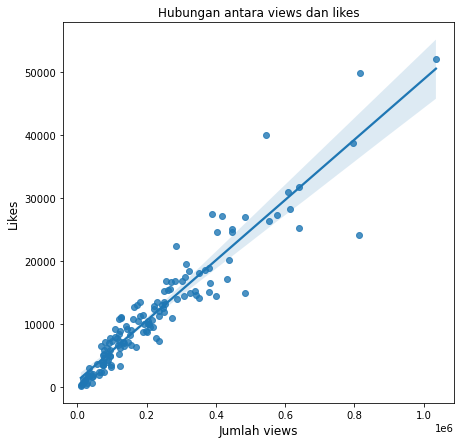

In [56]:
plt.figure(figsize = (7,7))
plt.title('Hubungan antara views dan likes')
sns.regplot(x = video_df['viewCount'], y = video_df['likeCount'])
plt.xlabel('Jumlah views', fontsize = 12)
plt.ylabel('Likes', fontsize = 12)
plt.show()

# Terdapat korelasi positif antara Jumlah Views dengan Likes pada video di channel youtube milik Ferry Irwandi. 

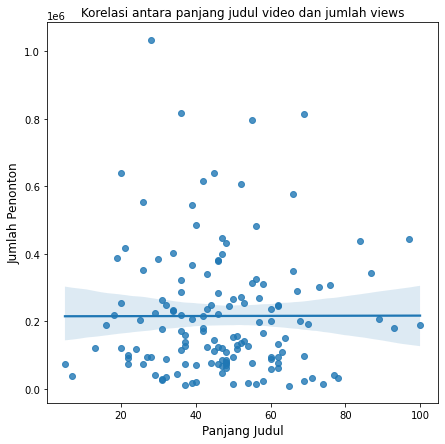

In [57]:
plt.figure(figsize = (7,7))
plt.title('Korelasi antara panjang judul video dan jumlah views')
sns.regplot(x = video_df['title'].str.len(), y = video_df['viewCount'])
plt.xlabel('Panjang Judul', fontsize = 12)
plt.ylabel('Jumlah Penonton', fontsize = 12)
plt.show()

# Tidak ada korelasi antara Jumlah panjang judul dengan dengan View pada video yang dibuat oleh Ferry Irwandi pada Channel Youtubenya 

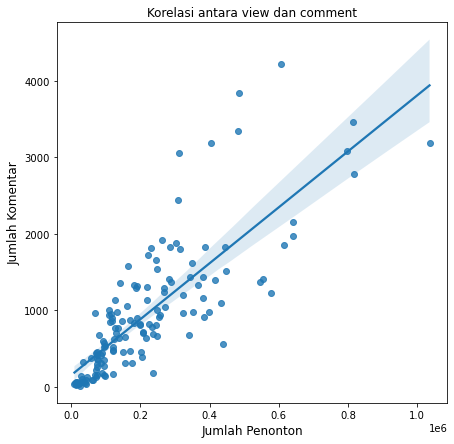

In [58]:
plt.figure(figsize = (7,7))
plt.title('Korelasi antara view dan comment')
sns.regplot(x = video_df['viewCount'], y = video_df['commentCount'])
plt.xlabel('Jumlah Penonton', fontsize = 12)
plt.ylabel('Jumlah Komentar', fontsize = 12)
plt.show()

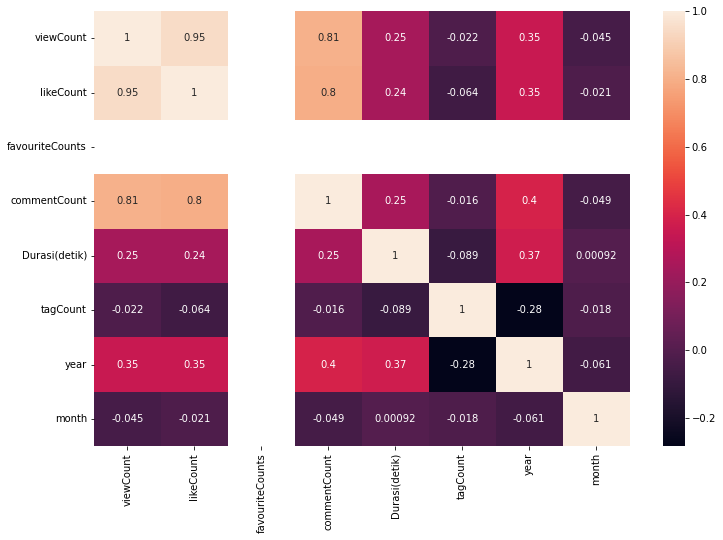

In [85]:
plt.figure(figsize=(12,8))
sns.heatmap(video_df.corr(), annot=True)
plt.show()

Korelasi tertinggi dimiliki viewCount(Jumlah View) dengan likeCount(Jumlah Likes), diikuti dengan Comment Count(Jumlah Komentar) dengan viewCount. Korelasi keduanya memiliki nilai korelasi yang mendekati satu atau bisa dibilang cukup kuat. 

In [60]:
video_df.dtypes

video_id                        object
channelTitle                    object
title                           object
description                     object
tags                            object
publishedAt        datetime64[ns, UTC]
viewCount                        int64
likeCount                        int64
favouriteCounts                 object
commentCount                     int64
duration                        object
definition                      object
caption                         object
Waktu_Upload       datetime64[ns, UTC]
Durasi(detik)                  float64
tagCount                         int64
year                             int64
month                            int64
dtype: object

In [62]:
data_w = pd.DataFrame(video_df['description'])

There are 20234 words in the combination of all cells in column tags.


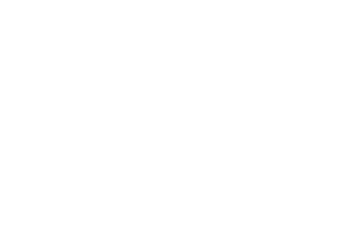

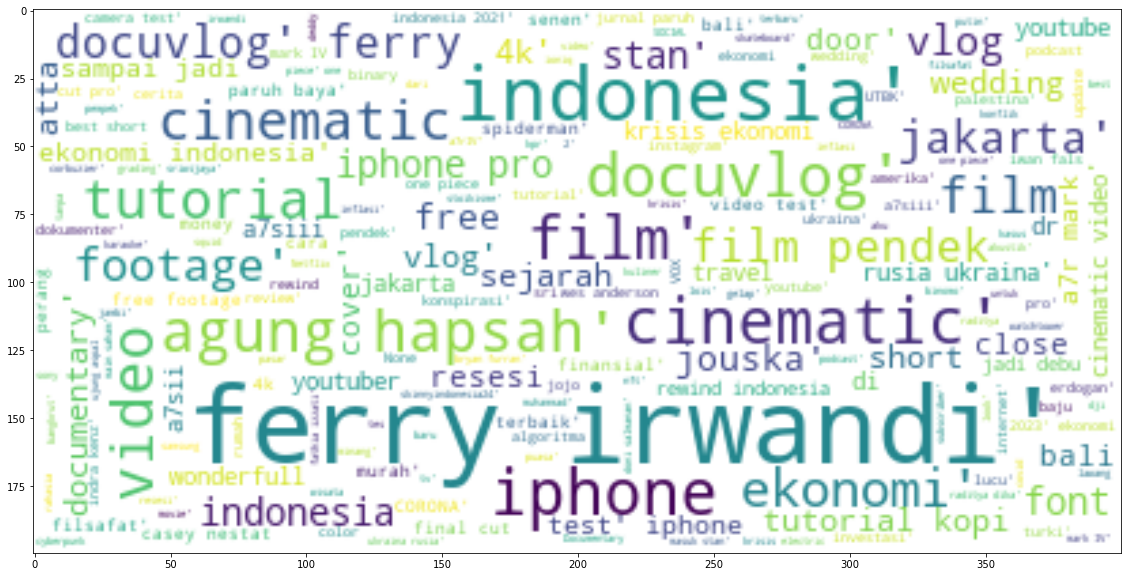

In [97]:
# Menampilkan WordCloud dari kolom tags

text = " ".join(review for review in video_df.tags.astype(str))
print ("There are {} words in the combination of all cells in column tags.".format(len(text)))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.axis("off")
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

There are 6914 words in the combination of all cells in column title.


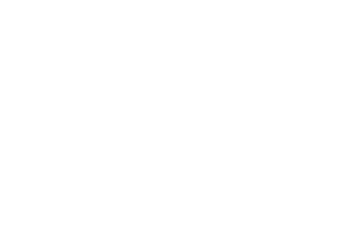

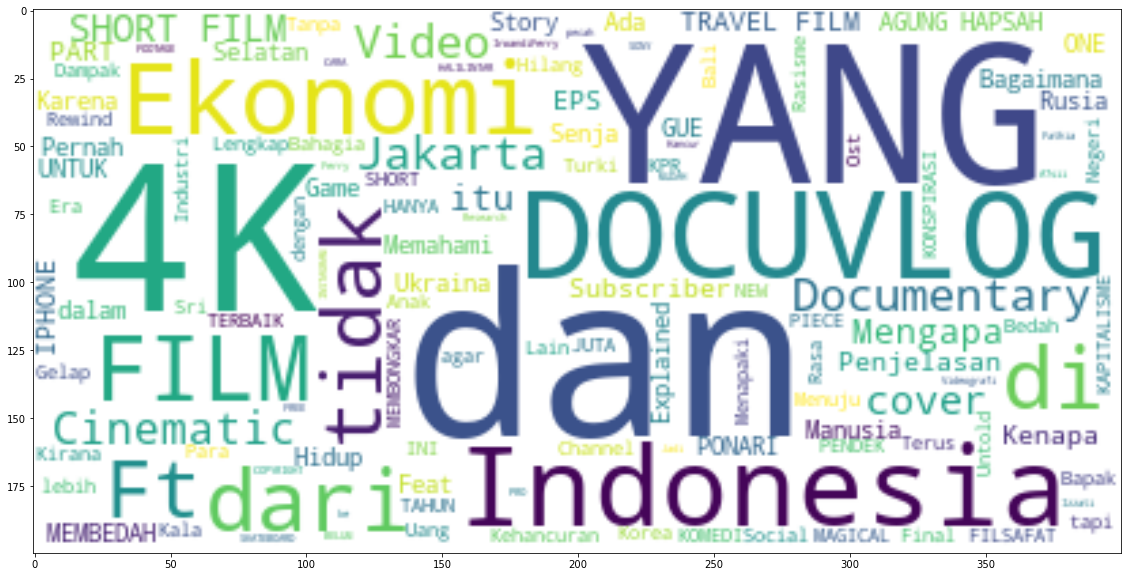

In [99]:
# Menampilkan WordCloud dari kolom title

text = " ".join(review for review in video_df.title.astype(str))
print ("There are {} words in the combination of all cells in column title.".format(len(text)))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.axis("off")
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

# Insight
* Ferry Irwandi mulai aktif mengupload video pada tahun 2020.
* Penonton Ferry irwandi sangan menyukai konten docuvlog, dua konten docuvlog masuk pada 5 video yang memiliki view paling tinggi. 
* Penonton yang menonton konten ferry irwandi cenderung menyukai video atau konten yang dibuat, terlihat dari korelasi yang tinggi antara Jumlah views dan likes pada youtube ferry irwandi. 
* Ferry Irwandi sangat suka membuat konten bergenre ekonomi, dapat dilihat dari banyaknya kata ekonomi yang muncul pada kolom title, yang ditampilkan dalam wordcloud. 